<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.724290,29.171604,37.595500,-0.006051,169.485344,169.491059,-0.005715
1,0.0,1.0,38.305915,92.897402,30.791373,-0.000805,171.993885,171.994520,-0.000635
2,0.0,2.0,47.716035,75.885158,25.468078,-0.001286,159.067984,159.069022,-0.001037
3,0.0,3.0,98.091949,95.301725,65.875207,-0.001860,269.267021,269.269325,-0.002304
4,0.0,4.0,72.534543,84.430238,36.476893,-0.000998,203.440676,203.441786,-0.001110
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.239560,61.080521,66.358917,0.003857,164.682856,164.679648,0.003208
59996,999.0,56.0,47.985230,56.871165,96.511497,0.001992,211.369884,211.369298,0.000586
59997,999.0,57.0,88.727066,67.343759,88.285918,0.003301,254.360044,254.358000,0.002044
59998,999.0,58.0,98.942962,30.162503,48.046713,0.019188,187.171366,187.152206,0.019159


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.724290,29.171604,37.595500,-0.006051,169.485344,169.491059,-0.005715
1,0.0,1.0,38.305915,92.897402,30.791373,-0.000805,171.993885,171.994520,-0.000635
2,0.0,2.0,47.716035,75.885158,25.468078,-0.001286,159.067984,159.069022,-0.001037
3,0.0,3.0,98.091949,95.301725,65.875207,-0.001860,269.267021,269.269325,-0.002304
4,0.0,4.0,72.534543,84.430238,36.476893,-0.000998,203.440676,203.441786,-0.001110
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.239560,61.080521,66.358917,0.003857,164.682856,164.679648,0.003208
59996,999.0,56.0,47.985230,56.871165,96.511497,0.001992,211.369884,211.369298,0.000586
59997,999.0,57.0,88.727066,67.343759,88.285918,0.003301,254.360044,254.358000,0.002044
59998,999.0,58.0,98.942962,30.162503,48.046713,0.019188,187.171366,187.152206,0.019159


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.724290  29.171604  37.595500  ...  169.485344  169.491059 -0.005715
      1.0    38.305915  92.897402  30.791373  ...  171.993885  171.994520 -0.000635
      2.0    47.716035  75.885158  25.468078  ...  159.067984  159.069022 -0.001037
      3.0    98.091949  95.301725  65.875207  ...  269.267021  269.269325 -0.002304
      4.0    72.534543  84.430238  36.476893  ...  203.440676  203.441786 -0.001110
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   27.239560  61.080521  66.358917  ...  164.682856  164.679648  0.003208
      56.0   47.985230  56.871165  96.511497  ...  211.369884  211.369298  0.000586
      57.0   88.727066  67.343759  88.285918  ...  254.360044  254.358000  0.002044
      58.0   98.942962  30.162503  48.046713  ...  187.171366  187.152206  0.019159
      59.0   90.663067  88.252264  23.555517  ...  212.469039  212.470550 -0.001511

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.724290  29.171604  37.595500  ...  169.485344  169.491059 -0.005715
      1.0    38.305915  92.897402  30.791373  ...  171.993885  171.994520 -0.000635
      2.0    47.716035  75.885158  25.468078  ...  159.067984  159.069022 -0.001037
      3.0    98.091949  95.301725  65.875207  ...  269.267021  269.269325 -0.002304
      4.0    72.534543  84.430238  36.476893  ...  203.440676  203.441786 -0.001110
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   27.239560  61.080521  66.358917  ...  164.682856  164.679648  0.003208
      56.0   47.985230  56.871165  96.511497  ...  211.369884  211.369298  0.000586
      57.0   88.727066  67.343759  88.285918  ...  254.360044  254.358000  0.002044
      58.0   98.942962  30.162503  48.046713  ...  187.171366  187.152206  0.019159
      59.0   90.663067  88.252264  23.555517  ...  212.469039  212.470550 -0.001511

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.724290,29.171604,37.595500,-0.006051,169.485344,169.491059,-0.005715
1,0.0,1.0,38.305915,92.897402,30.791373,-0.000805,171.993885,171.994520,-0.000635
2,0.0,2.0,47.716035,75.885158,25.468078,-0.001286,159.067984,159.069022,-0.001037
3,0.0,3.0,98.091949,95.301725,65.875207,-0.001860,269.267021,269.269325,-0.002304
4,0.0,4.0,72.534543,84.430238,36.476893,-0.000998,203.440676,203.441786,-0.001110
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.239560,61.080521,66.358917,0.003857,164.682856,164.679648,0.003208
59996,999.0,56.0,47.985230,56.871165,96.511497,0.001992,211.369884,211.369298,0.000586
59997,999.0,57.0,88.727066,67.343759,88.285918,0.003301,254.360044,254.358000,0.002044
59998,999.0,58.0,98.942962,30.162503,48.046713,0.019188,187.171366,187.152206,0.019159


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.724290  29.171604  37.595500  ...  169.485344  169.491059 -0.005715
      1.0    38.305915  92.897402  30.791373  ...  171.993885  171.994520 -0.000635
      2.0    47.716035  75.885158  25.468078  ...  159.067984  159.069022 -0.001037
      3.0    98.091949  95.301725  65.875207  ...  269.267021  269.269325 -0.002304
      4.0    72.534543  84.430238  36.476893  ...  203.440676  203.441786 -0.001110
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   27.239560  61.080521  66.358917  ...  164.682856  164.679648  0.003208
      56.0   47.985230  56.871165  96.511497  ...  211.369884  211.369298  0.000586
      57.0   88.727066  67.343759  88.285918  ...  254.360044  254.358000  0.002044
      58.0   98.942962  30.162503  48.046713  ...  187.171366  187.152206  0.019159
      59.0   90.663067  88.252264  23.555517  ...  212.469039  212.470550 -0.001511

[60000 rows x 7 columns]

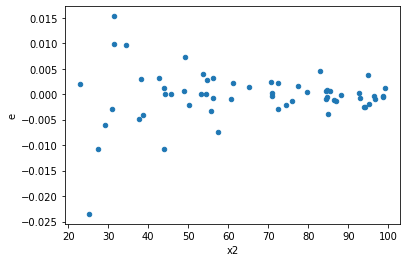

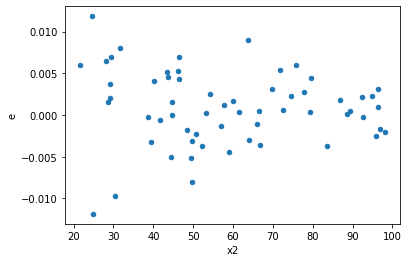

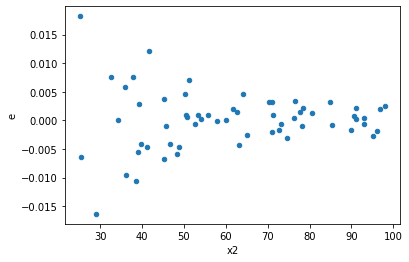

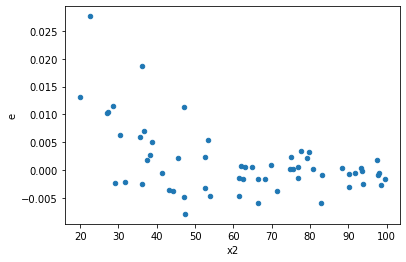

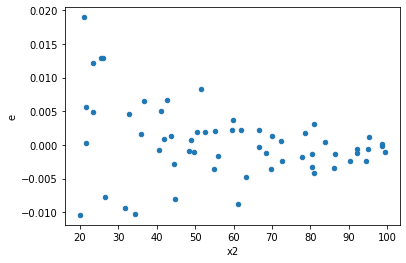

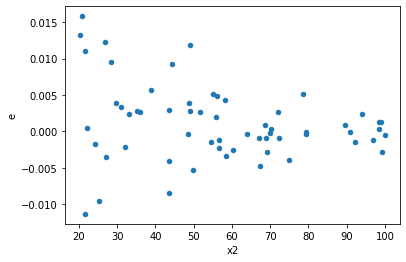

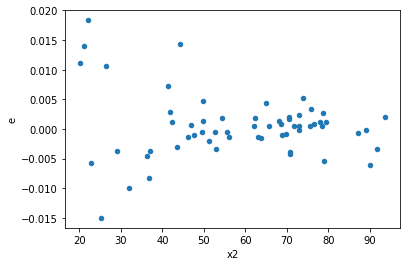

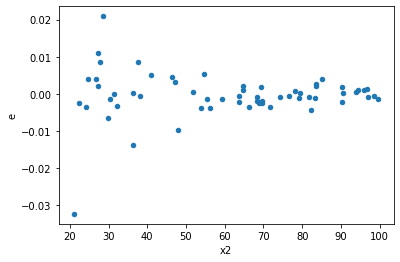

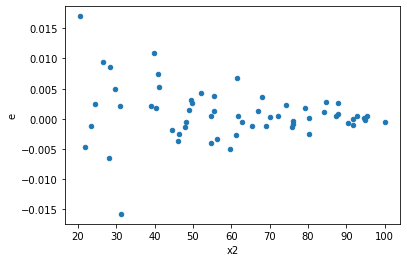

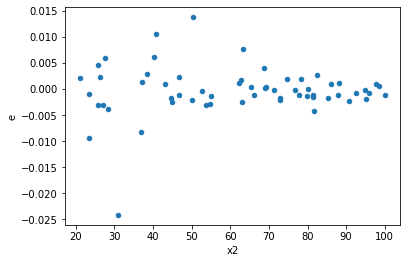

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.0013325245390025055,7.650526088890518e-05,6.345354947630978e-05,3.643107661376437e-06,0.05741377261703196,1.1560547617857838e-08,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.000705549068197533,0.00013460809902193015,3.3597574676073e-05,6.409909477234769e-06,0.19078488667813512,0.00036172045048814147,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,0.0008262312995249842,7.679906423374202e-05,3.934434759642782e-05,3.657098296844858e-06,0.09295104685321802,9.685793016502163e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,0.0009588682522984473,9.229765051918705e-05,4.566039296659273e-05,4.3951262151993835e-06,0.09625686354506546,1.3198150004500911e-06,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.0011663248511638777,8.54603249925318e-05,5.553927862685132e-05,4.069539285358657e-06,0.07327317505688985,1.1267233619348095e-07,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.0012130130936968265,9.318049427541228e-05,5.776252827127745e-05,4.437166394067251e-06,0.07681738536839015,1.7374302506448103e-07,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.0014513764004258354,0.0001698884862512926,6.911316192503978e-05,8.08992791672822e-06,0.11705336134819827,7.197401025033952e-06,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,0.0019163028533941463,6.770689519008316e-05,9.125251682829269e-05,3.224137866194436e-06,0.03533204319461354,1.0574675191728797e-10,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,0.0009458298189302378,3.7847262879585774e-05,4.503951518715418e-05,1.8022506133136082e-06,0.04001487595558382,3.5837428594910836e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    997
Reject001=1 : Homoscedasticity        3
Name: Result_test, dtype: int64